# 22.05 Guided Example and Challenge

In this notebook you'll be exploring data from Epicurious dataset, which has a collection of recipes, key terms and ingredients, and their ratings.  You'll want to see if you can use the ingredient and keyword list to predict the rating.  

For someone writing a cookbook this could be useful information that could help them choose which recipes to include because they're more likely to be enjoyed and therefore make the book more likely to be successful.

First, load the dataset, it's [available on Kaggle](https://www.kaggle.com/hugodarwood/epirecipes).  You'll use the .CSV file here and pull out column names and some summary statistics for ratings.

### Outside References

- [Chapter 2: SVM (Support Vector Machine) - Theory](https://medium.com/machine-learning-101/chapter-2-svm-support-vector-machine-theory-f0812effc72)
- [Chapter 2: SVM (Support Vector Machine) - Coding](https://medium.com/machine-learning-101/chapter-2-svm-support-vector-machine-coding-edd8f1cf8f2d)
- [In Depth: Parameter Tuning for SVC](https://medium.com/all-things-ai/in-depth-parameter-tuning-for-svc-758215394769)

### Imports

In [44]:
import time

import numpy as np 
import pandas as pd 
import scipy 
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn import svm
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score

In [3]:
raw_data = pd.read_csv("epi_r.csv")

In [4]:
list(raw_data.columns)

['title',
 'rating',
 'calories',
 'protein',
 'fat',
 'sodium',
 '#cakeweek',
 '#wasteless',
 '22-minute meals',
 '3-ingredient recipes',
 '30 days of groceries',
 'advance prep required',
 'alabama',
 'alaska',
 'alcoholic',
 'almond',
 'amaretto',
 'anchovy',
 'anise',
 'anniversary',
 'anthony bourdain',
 'aperitif',
 'appetizer',
 'apple',
 'apple juice',
 'apricot',
 'arizona',
 'artichoke',
 'arugula',
 'asian pear',
 'asparagus',
 'aspen',
 'atlanta',
 'australia',
 'avocado',
 'back to school',
 'backyard bbq',
 'bacon',
 'bake',
 'banana',
 'barley',
 'basil',
 'bass',
 'bastille day',
 'bean',
 'beef',
 'beef rib',
 'beef shank',
 'beef tenderloin',
 'beer',
 'beet',
 'bell pepper',
 'berry',
 'beverly hills',
 'birthday',
 'biscuit',
 'bitters',
 'blackberry',
 'blender',
 'blue cheese',
 'blueberry',
 'boil',
 'bok choy',
 'bon appétit',
 'bon app��tit',
 'boston',
 'bourbon',
 'braise',
 'bran',
 'brandy',
 'bread',
 'breadcrumbs',
 'breakfast',
 'brie',
 'brine',
 'brisk

In [5]:
raw_data["rating"].describe()

count    20052.000000
mean         3.714467
std          1.340829
min          0.000000
25%          3.750000
50%          4.375000
75%          4.375000
max          5.000000
Name: rating, dtype: float64

There are a few things you can learn from this analysis.  From a ratings perspective, there are just over 20,000 recipes with an average rating of 3.71.  What is interesting is that the 25<sup>th</sup> percentile is above the mean.  This means there is likely outlier population.  This make sense when you think about reviews: some bad recipes may have very few, very low scores.  You can help validate this with a histogram.

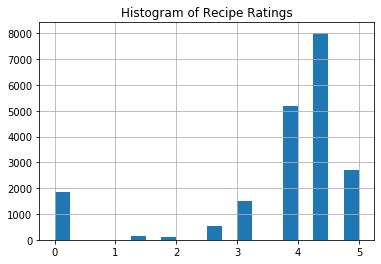

In [5]:
raw_data["rating"].hist(bins=20)
plt.title("Histogram of Recipe Ratings")
plt.show();

A few things are shown in the histogram.  First, there are sharp discontinuities.  You don't have continuous data.  No recipe has a 3.5 rating, for example.  Also, you see the unanticipated increase at 0.

Try the naive approach again, this time using SVM Regressor.  But first, you'll have to do a bit of data cleaning.  Also note that this will take a while to run, compared to some of the models you've done before.  It's because of the number of features in the dataset.

In [7]:
svr = SVR()
X = raw_data.drop(
    ["rating", "title", "calories", "protein", "fat", "sodium"], 1).sample(frac=0.3, 
        replace=True, random_state=1)
Y = raw_data["rating"].sample(frac=0.3, replace=True, random_state=1)
svr.fit(X,Y)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

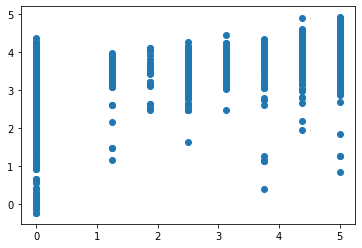

In [8]:
# Take a look at a scatter plot comparing actual to predicted
plt.scatter(Y, svr.predict(X));

As you can see, the plot is pretty useless.  This is because of the discontinuous nature of the outcome variable.  There's too much data for you to really see what's going on here.  If you wanted to look at it you could create histograms, but move on to the scores of both the full fit model and with cross validation.  Again if you choose to run it again it will take some time, so you probably shouldn't.

In [9]:
svr.score(X,Y)

0.4099845913800794

In [11]:
cross_val_score(svr, X, Y, cv=5)

array([0.19563385, 0.14683481, 0.15013401, 0.13597791, 0.16082192])

Notice, that this did not seem to work very well.  In fact, it is remarkably poor.  Now there are many things that you can do here.  First, the overfit is a problem, even though it was poor in the first place.  You could go back and clean up the feature set.  There might be some gains to be made by getting rid of the noise.  

You could also see how removing the nulls but including dietary information performs.  Though it's a slight change to the question you could still possibly get some improvements there.

Lastly, you could take the regression problem and turn it into a classifier.  With number of features and a discontinuous outcome, you might have better luck thinking of this as a classification problem.  You could make it simpler still by instead of classifying on each possible value, group reviews to some decided and low values.  **This is your challenge.**

Transform this regression problem into a binary classifier and clean up the feature set.  You can choose whether to include nutritional information but try to cut the feature set down to the 30 most valuable features.

When finished, take a moment to think about bias.  Is there anything in this dataset that makes you think it could be biased, perhaps extremely so?

There are several things, but most glaringly is that you don't have a random sample.  It could be, and probably is, that the people more likely to choose some kinds of recipes are mor likely to give high reviews.  Afterall, people who eat chocolate _might_ just be happier people.


## Challenge

First step remove columns with null values.  Second, bin the ratings into "bad","good", and "great" quality groupings.  Third, remove the continuous columns with low means as a way to reduce dimensionality of the continuous variables.

In [38]:
# Plot a correlaiton matrix
def corr_plot(corr_mat,figsize):
    """
        Pass in a correlation matrix and figsize (as a tuple) and plot the corresponding heatmap.
    """
    plt.figure(figsize=figsize)

    sns.heatmap(corr_mat, square=True, annot=True, linewidth=0.5)
    plt.title(f"Correlation matrix of winsorized variables")

    # Fix display issues for this version of matplotlib
    b,t = plt.ylim()
    b += 0.5
    t -= 0.5
    plt.ylim(b,t)
    # plt.yticks(rotation=360)

    plt.show();

In [9]:
# Create a list of columns with null values that will be dropped from the dataframe
null_cols = [col for col in raw_data.columns if raw_data[col].isnull().sum()>0]
null_cols

['calories', 'protein', 'fat', 'sodium']

In [20]:
# Take a look at the value couts for uniques the ratings column
raw_data["rating"].value_counts().sort_index()

0.000    1836
1.250     164
1.875     124
2.500     532
3.125    1489
3.750    5169
4.375    8019
5.000    2719
Name: rating, dtype: int64

In [27]:
# Using .cut() bin the ratings into "bad","good", and "great" 
raw_data["quality"] = pd.cut(raw_data["rating"],bins=3,labels=["bad","good","great"])

In [30]:
# Remove columns with highly skewed data
skewed_cols = [col for col in raw_data.select_dtypes(exclude=["category","object","datetime"]).columns if raw_data[col].mean()<0.1]
len(skewed_cols)

648

In [31]:
# Create a list of columns to be dropped
drop_cols = null_cols+skewed_cols

In [35]:
# Make a copy of the dataframe and drop columns
model = raw_data.drop(drop_cols,axis=1)
model.columns

Index(['title', 'rating', 'bake', 'bon appétit', 'dairy free', 'dessert',
       'dinner', 'fall', 'gourmet', 'healthy', 'kidney friendly', 'kosher',
       'no sugar added', 'onion', 'peanut free', 'pescatarian', 'quick & easy',
       'sauté', 'side', 'soy free', 'sugar conscious', 'summer', 'tomato',
       'tree nut free', 'vegetable', 'vegetarian', 'wheat/gluten-free',
       'winter', 'quality'],
      dtype='object')

In [37]:
# Take one last look at the correlations to see if any other columns need to be dropped
corr_matrix = model.select_dtypes(exclude="object").corr()

corr_matrix

,rating,bake,bon appétit,dairy free,dessert,dinner,fall,gourmet,healthy,kidney friendly,...,side,soy free,sugar conscious,summer,tomato,tree nut free,vegetable,vegetarian,wheat/gluten-free,winter
rating,1.000000,0.076978,0.124549,0.019046,0.026191,0.060957,0.067343,0.047354,0.024688,0.021504,...,0.025751,0.092965,0.040573,0.027884,0.046579,0.081347,0.030348,0.033102,0.030278,0.055126
bake,0.076978,1.000000,0.030444,-0.142730,0.387118,-0.099476,0.101864,0.035522,-0.098930,0.178974,...,-0.033560,0.135940,-0.053774,-0.099094,-0.070941,0.015324,-0.069498,0.155446,-0.139361,0.076251
bon appétit,0.124549,0.030444,1.000000,-0.020380,0.042858,0.009369,0.043180,-0.658596,0.030815,0.009670,...,0.017289,0.063913,0.008377,0.042043,0.011529,0.044962,-0.009383,0.034803,0.027479,0.010565
dairy free,0.019046,-0.142730,-0.020380,1.000000,-0.063745,0.267875,-0.033521,-0.011825,0.160773,0.116795,...,0.279748,0.414360,0.289089,0.026639,0.014035,0.492778,0.053616,0.168283,0.458528,-0.030296
dessert,0.026191,0.387118,0.042858,-0.063745,1.000000,-0.181205,0.030543,-0.002930,-0.112581,0.409538,...,-0.191388,0.262686,-0.157700,0.041926,-0.160104,0.101788,-0.147612,0.313074,0.043295,0.007499
dinner,0.060957,-0.099476,0.009369,0.267875,-0.181205,1.000000,0.019719,-0.098862,0.117913,-0.094151,...,-0.044953,0.262148,0.211293,-0.034938,0.035137,0.324696,0.015520,-0.108220,0.196003,0.013306
fall,0.067343,0.101864,0.043180,-0.033521,0.030543,0.019719,1.000000,-0.005805,-0.032742,-0.006019,...,0.081362,0.061120,-0.030923,-0.175679,-0.038758,0.030067,0.083709,0.031379,0.016987,0.117743
gourmet,0.047354,0.035522,-0.658596,-0.011825,-0.002930,-0.098862,-0.005805,1.000000,-0.086748,-0.004260,...,0.027747,-0.061647,-0.011474,-0.004762,-0.008746,-0.052450,0.032638,-0.007531,-0.036107,0.064346
healthy,0.024688,-0.098930,0.030815,0.160773,-0.112581,0.117913,-0.032742,-0.086748,1.000000,-0.041339,...,0.121633,0.078277,0.059414,0.020398,0.058789,0.075702,0.059551,0.123683,0.135510,-0.054610
kidney friendly,0.021504,0.178974,0.009670,0.116795,0.409538,-0.094151,-0.006019,-0.004260,-0.041339,1.000000,...,0.039264,0.400354,0.170440,-0.014572,-0.102565,0.297754,-0.072462,0.375756,0.179796,-0.012728


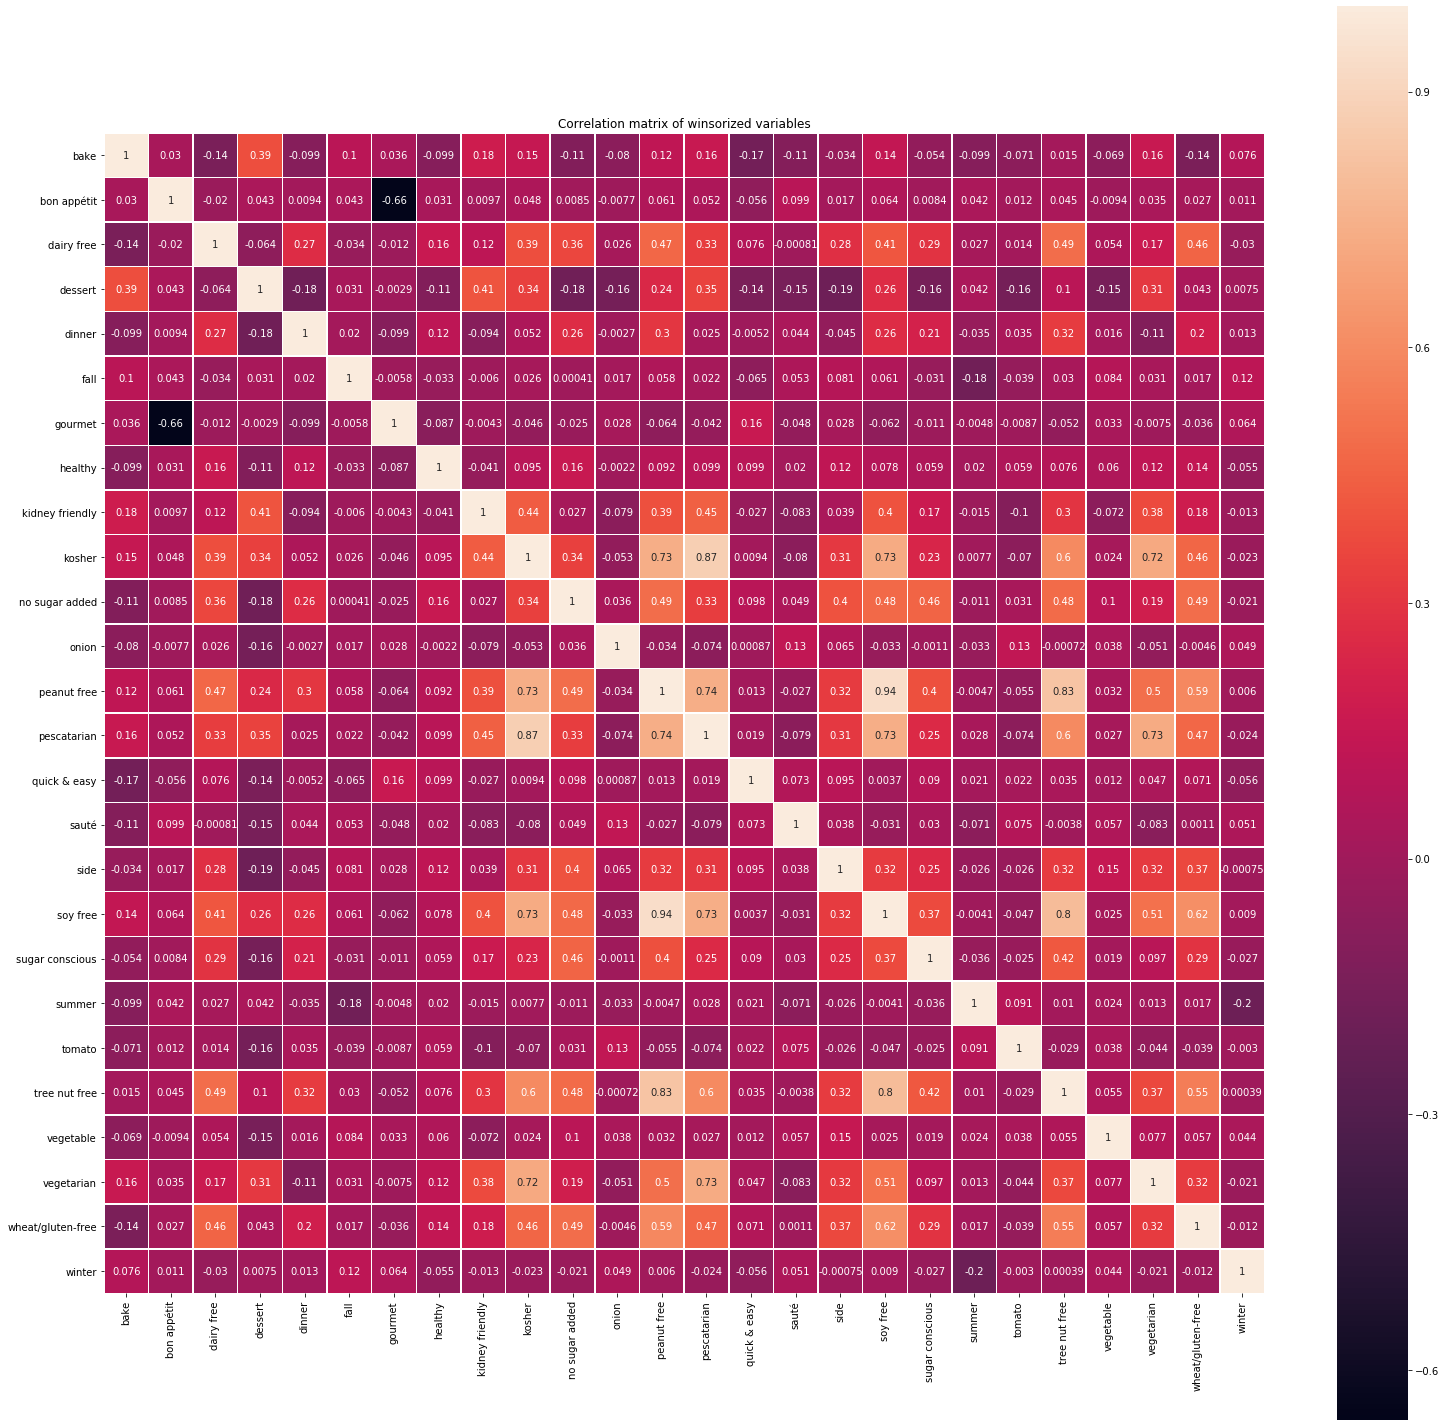

In [39]:
# Get a column count to set the figure size
col_count = len(corr_matrix.iloc[1:,1:].columns)

# Plot the correlation matrix
corr_plot(corr_matrix.iloc[1:,1:],(col_count,col_count))

In [43]:
# Drop these columns because of their tight correlation to other variables
corr_drops = ["peanut free","pescatarian","soy free","tree nut free","vegetarian","wheat/gluten-free"]

model = model.drop(corr_drops,axis=1)
model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20052 entries, 0 to 20051
Data columns (total 23 columns):
title              20052 non-null object
rating             20052 non-null float64
bake               20052 non-null float64
bon appétit        20052 non-null float64
dairy free         20052 non-null float64
dessert            20052 non-null float64
dinner             20052 non-null float64
fall               20052 non-null float64
gourmet            20052 non-null float64
healthy            20052 non-null float64
kidney friendly    20052 non-null float64
kosher             20052 non-null float64
no sugar added     20052 non-null float64
onion              20052 non-null float64
quick & easy       20052 non-null float64
sauté              20052 non-null float64
side               20052 non-null float64
sugar conscious    20052 non-null float64
summer             20052 non-null float64
tomato             20052 non-null float64
vegetable          20052 non-null float64
winter    

In [48]:
# Y is the target variable 
Y = model["quality"]

# X is the feature set 
X = model.select_dtypes(exclude=["object","category"])

# Start a timer to check runtime
start = time.time()

# Instantiate the svm
svc = svm.SVC()

# Fit the model to X & Y
fitted = svc.fit(X,Y)

# Get the model predictions
y_pred = svc.predict(X)

# Print the model runtime
print(f"Runtime {time.time() - start:0.2f} seconds")

svc_score = svc.score(X,Y)
# How did the model score
print(f"Model score: {svc_score:0.3f}")

Runtime 1.63 seconds
Model score: 1.000


Now it looks like the model is overfitting.  Remove the ratings column and try agian.

In [51]:
# X is the feature set
X = X.drop(["rating"],axis=1)

# Start a timer to check runtime
start = time.time()

# Instantiage the svm
svc = svm.SVC()

# Fit the model to X & Y
fitted = svc.fit(X,Y)

# Get the model predictions
y_pred = svc.predict(X)

# Print the model runtime
print(f"Runtime {time.time() - start:0.2f} seconds")

svc_score = svc.score(X,Y)
# How did the model score
print(f"Model score: {svc_score:0.3f}")

Runtime 30.16 seconds
Model score: 0.793


In [52]:
# Set a timer to check runtime
start = time.time()

# Set the penalty parameter for the model 
iterative_model = svm.SVC(C=100)

# Check the model runtime
print(f"Runtime: {time.time() - start:0.2f} seconds")

Runtime: 0.00


In [53]:
# Set a timer to check runtime
start = time.time()

# Cross-validate the model
iterative_cross_val_score = cross_val_score(iterative_model,X,Y,cv=5)

# Check model runtime
print(f"Runtime: {time.time() - start:0.2f} seconds")

# Check the model's scores
print(f"Accuracy: {iterative_cross_val_score.mean():0.3f}, (+/-{iterative_cross_val_score.std():0.3f})")

Runtime: 276.43 seconds
Accuracy: 0.768, (+/-0.003)
